# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


In [193]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
display(data.head())
display(data.info())

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


None

# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [194]:
cols_servo_lower = []

for column in data.columns:
    if column == 'ST':
        cols_servo_lower.append('state')
    else:
        cols_servo_lower.append(column.lower())

data.columns = cols_servo_lower

data.columns = data.columns.str.replace(' ', '_')

data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [195]:
display(data['gender'].value_counts())



def repgender (x):

    if x in ['female', 'Femal']:
        return 'F'
    elif x in ['Male']:
        return 'M'
    else:
        return x
    
data['gender'] = list(map(repgender, data['gender']))



display(data['gender'].value_counts())

gender
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64

gender
F    502
M    452
Name: count, dtype: int64

In [196]:
display(data['state'].value_counts())

def repstate (x):
    if x == 'WA':
        return 'Washington'
    elif x == 'AZ':
        return 'Arizona'
    else:
        return x
    
data['state'] = list(map(repstate, data['state']))

display(data['state'].value_counts())

state
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64

state
Oregon        320
Arizona       211
California    211
Cali          120
Washington    111
Nevada         98
Name: count, dtype: int64

In [197]:
display(data['education'].value_counts())

data['education'] = data['education'].where(data['education'] != 'Bachelors', 'Bachelor')

display(data['education'].value_counts())

education
Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: count, dtype: int64

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

In [198]:
display(data['customer_lifetime_value'])


data['customer_lifetime_value'] = pd.to_numeric(data['customer_lifetime_value'].str.replace('%', ''), errors='coerce')


display(data['customer_lifetime_value'])

0               NaN
1        697953.59%
2       1288743.17%
3        764586.18%
4        536307.65%
           ...     
4003            NaN
4004            NaN
4005            NaN
4006            NaN
4007            NaN
Name: customer_lifetime_value, Length: 4008, dtype: object

0              NaN
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
4003           NaN
4004           NaN
4005           NaN
4006           NaN
4007           NaN
Name: customer_lifetime_value, Length: 4008, dtype: float64

In [199]:
display(data['vehicle_class'].value_counts())

# data['vehicle_class'] = data['vehicle_class'].where(data['vehicle_class'] not in ['Sports Car', 'Luxury SUV', 'Luxury Car'], 'Luxury')

def repcar (x):
    if x in ['Sports Car', 'Luxury SUV', 'Luxury Car']:
        return 'Luxury'
    else:
        return x

data['vehicle_class'] = list(map(repcar, data['vehicle_class']))    

display(data['vehicle_class'].value_counts())

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Sports Car        57
Luxury SUV        20
Luxury Car        14
Name: count, dtype: int64

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [210]:
display(data['number_of_open_complaints'].value_counts(dropna=False))

def cleanCLV(x):
    
    if type(x) != float:
        splited = x.split('/')
        if len(splited) > 1: 
            return splited[1]
        else:
            return x
    else:
        return x

data['number_of_open_complaints'] = list(map(cleanCLV, data['number_of_open_complaints']))

data['number_of_open_complaints'] = pd.to_numeric(data['number_of_open_complaints'],errors='coerce')

display(data['number_of_open_complaints'].unique())


number_of_open_complaints
0    827
1    138
2     50
3     34
4     13
5      6
Name: count, dtype: int64

array([0, 2, 1, 3, 5, 4], dtype=int64)

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [201]:
print(data.shape)
data = data.dropna(how='all')
print(data.shape)

(4008, 11)
(1071, 11)


In [202]:
display(data.isnull().sum())
data = data[data['customer_lifetime_value'].isnull()==False]
display(data.isnull().sum())

customer                       0
state                          0
gender                       117
education                      0
customer_lifetime_value        3
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

customer                       0
state                          0
gender                       116
education                      0
customer_lifetime_value        0
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

In [203]:
display(data['gender'].value_counts(dropna=False))

data['gender'] = data['gender'].fillna('F')

display(data.isnull().sum())
display(data['gender'].value_counts(dropna=False))

gender
F      501
M      451
NaN    116
Name: count, dtype: int64

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

gender
F    617
M    451
Name: count, dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [204]:
display(data.duplicated(subset=['customer']).sum())

data = data.reset_index(drop=True)
data

0

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
1,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
2,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
3,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
4,OC83172,Oregon,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1063,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1064,VJ51327,Cali,F,High School or Below,2031499.76,63209.0,102.0,2,Personal Auto,SUV,207.320041
1065,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1066,CW49887,California,F,Master,462680.11,79487.0,114.0,0,Special Auto,SUV,547.200000


There is no duplicated rows even only looking at the 'customer' column, so I think it's all good. 

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [205]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [206]:
focus_customers = data[data["total_claim_amount"] >= data.describe()["total_claim_amount"]["75%"]]
focus_customers = data[data["customer_lifetime_value"] <= data.describe()["customer_lifetime_value"]["25%"]]
focus_customers.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,267.000000,267.000000,267.000000,267.000000
mean,291874.071910,37377.838951,124.082397,333.224828
std,52510.358963,29924.361651,551.989914,227.232250
min,200435.070000,0.000000,61.000000,1.838367
25%,252580.670000,5156.000000,65.000000,142.835317
50%,274451.960000,33663.000000,71.000000,321.600000
75%,329877.320000,60944.500000,88.000000,468.000000
max,402381.440000,98473.000000,6464.000000,1185.988301


# Lab | Customer Analysis Round 3

In [212]:
display(data.head())
display(data.info())
display(data.describe())

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
1,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
2,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
3,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
4,OC83172,Oregon,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1068 non-null   object 
 1   state                      1068 non-null   object 
 2   gender                     1068 non-null   object 
 3   education                  1068 non-null   object 
 4   customer_lifetime_value    1068 non-null   float64
 5   income                     1068 non-null   float64
 6   monthly_premium_auto       1068 non-null   float64
 7   number_of_open_complaints  1068 non-null   int64  
 8   policy_type                1068 non-null   object 
 9   vehicle_class              1068 non-null   object 
 10  total_claim_amount         1068 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 91.9+ KB


None

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,1.068000e+03,1068.000000,1068.000000,1068.000000,1068.000000
mean,7.936903e+05,39315.411985,192.691948,0.395131,405.870113
std,6.434784e+05,30484.373979,1603.241719,0.884764,292.917158
min,2.004351e+05,0.000000,61.000000,0.000000,0.382107
25%,4.034080e+05,14072.000000,68.000000,0.000000,204.071460
50%,5.881742e+05,36226.000000,82.500000,0.000000,355.200000
75%,8.962872e+05,64668.750000,109.250000,0.000000,532.800000
max,5.816655e+06,99960.000000,35354.000000,5.000000,2893.239678


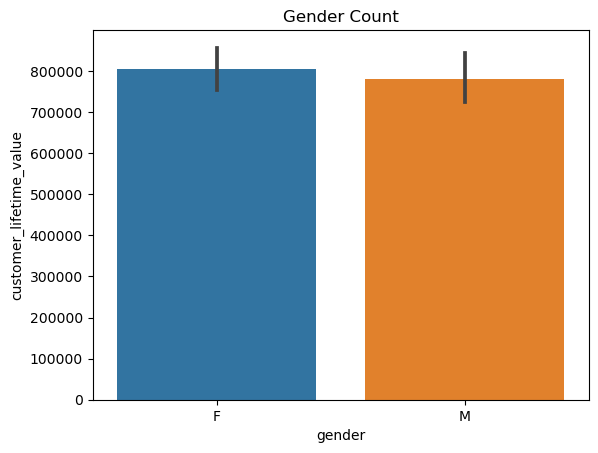

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="gender", y="customer_lifetime_value", data=data).set(title='Customer Gender Average Lifetime Value')
plt.show()

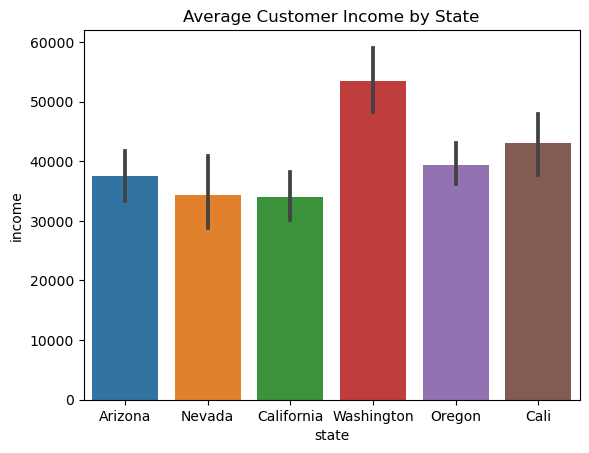

In [226]:
sns.barplot(x="state", y="income", data=data).set(title='Average Customer Income by State')
plt.show()

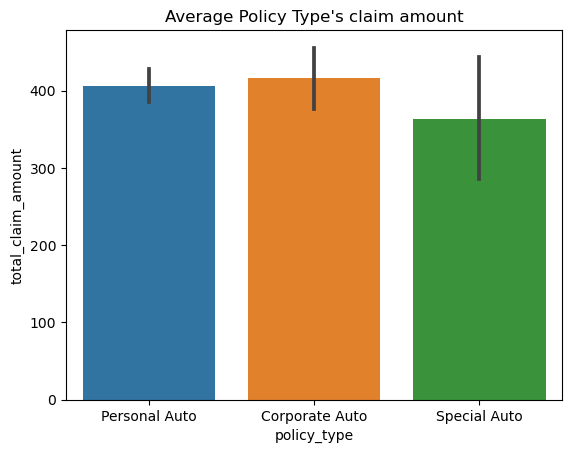

In [221]:
sns.barplot(x="policy_type", y="total_claim_amount", data=data).set(title="Average Policy Type's claim amount")
plt.show()

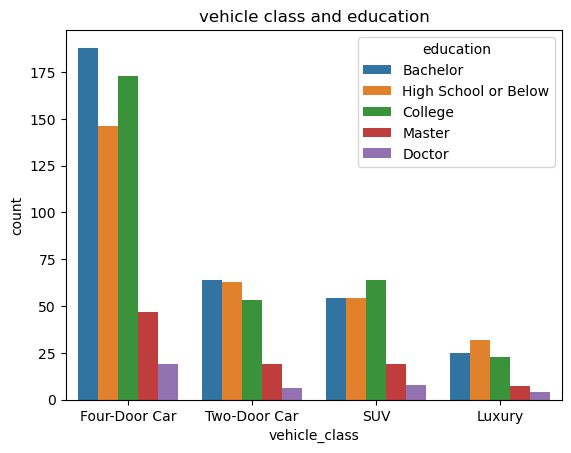

In [224]:
sns.countplot(x="vehicle_class", hue="education", data=data).set(title="vehicle class and education")
plt.show()

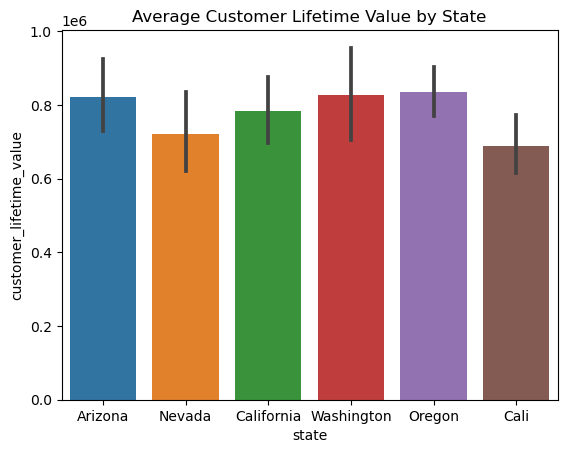

In [228]:
sns.barplot(x="state", y="customer_lifetime_value", data=data).set(title='Average Customer Lifetime Value by State')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


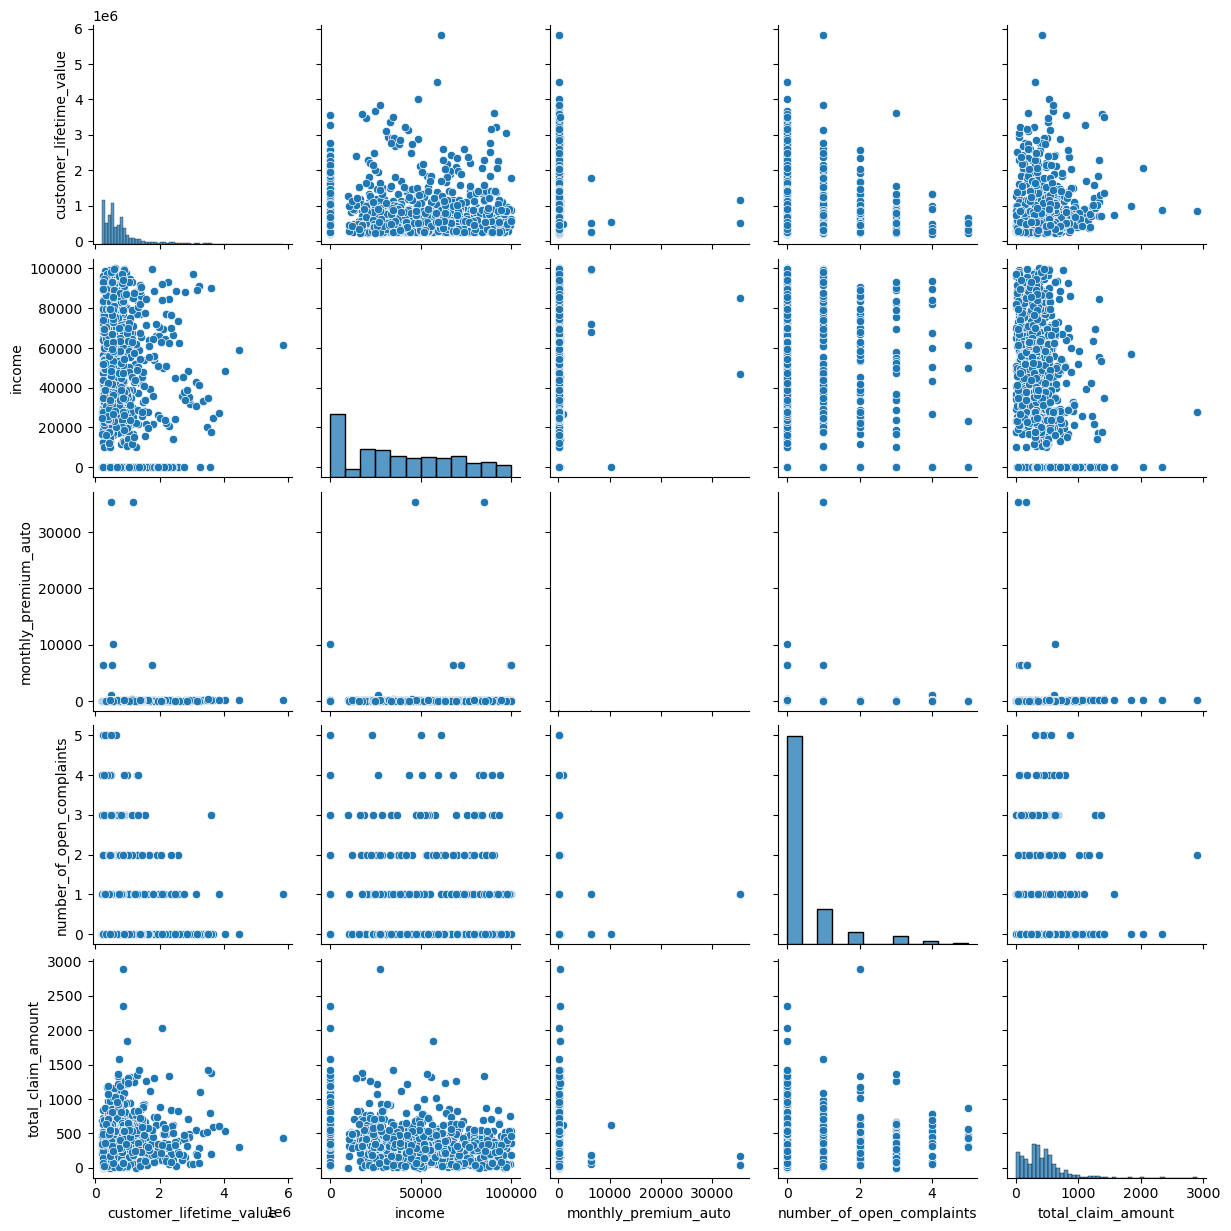

In [225]:
sns.pairplot(data)